In [54]:
import pandas as pd
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn import metrics 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


#Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

In [55]:
heart=pd.read_json('./data/heart.json')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [56]:
heart['Sex']=heart['Sex'].replace({'M':0,'F':1})
heart['ExerciseAngina']=heart['ExerciseAngina'].replace({'N':0,'Y':1})
heart['ChestPainType']=heart['ChestPainType'].replace({'TA':0,'ATA':1,'NAP':2,'ASY':3})
heart['RestingECG']=heart['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2})
heart['ST_Slope']=heart['ST_Slope'].replace({'Up': 0, 'Flat': 1, 'Down': 2})

C:\Users\szaue\AppData\Local\Temp\ipykernel_8584\938268009.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart['Sex']=heart['Sex'].replace({'M':0,'F':1})
C:\Users\szaue\AppData\Local\Temp\ipykernel_8584\938268009.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart['ExerciseAngina']=heart['ExerciseAngina'].replace({'N':0,'Y':1})


In [57]:
heart.info()
columns_numeric=heart.select_dtypes(include=['int','float'])
heart_numeric=heart[columns_numeric.columns]
heart_numeric.head()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(3), int64(8)
memory usage: 82.5 KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,2,0
1,49,1,2,160,180,0,1,156,0,1.0,1,1
2,37,0,1,130,283,0,2,98,0,0.0,2,0
3,48,1,0,138,214,0,1,108,1,1.5,1,1
4,54,0,2,150,195,0,1,122,0,0.0,2,0


In [58]:
X=heart_numeric.drop('HeartDisease',axis=1)
y=heart_numeric['HeartDisease']


In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
param_dist = {'n_estimators': randint(50, 500), 'max_depth': randint(1, 20)}
rfc=RandomForestClassifier()
rnd_SearchCV=RandomizedSearchCV(rfc, param_distributions=param_dist,n_iter=5,cv=5)
rnd_SearchCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000202DEE78050>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000202DEF52DD0>})

In [61]:
y_pred=rnd_SearchCV.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8804347826086957


<Axes: >

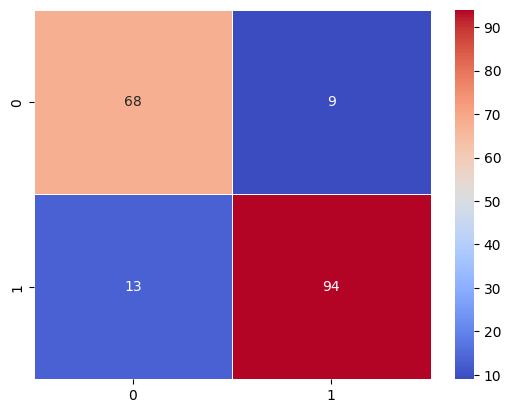

In [62]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', linewidths=0.5)

In [63]:
import pickle
model_filename='heart-failure_model.pkl'
pickle.dump(rnd_SearchCV.best_estimator_, open(model_filename, 'wb'))
model = pickle.load(open(model_filename, 'rb'))